In [1]:
#%matplotlib widget
%pylab inline
pylab.rcParams['figure.figsize'] = (8, 6)
import  general.utils as utils
import result_analyse.resultloader
import result_analyse.visualisation as vs

from ipywidgets import interact, interactive, fixed, interact_manual

@interact
def result_selector(file=result_analyse.resultloader.get_runs()):
    if(file==None):return
    print('Analysing ',file)
    run_info,dataset,evalres=utils.loadState(file)
    for i in range(len(evalres)):
        quality=evalres[i].quality
        print('Evalution quality fold=%d is %s' % (i, quality))
        
    #vs.visualize(dataset)
    print(len(dataset.sensor_events))
    vs.plot_pre_act(dataset,{'test':evalres})
    vs.plot_CM(dataset,evalres)
    #for i in range(len(evalres)):
        # vs.my_result_analyse(evalres[i].real_events,evalres[i].pred_events)
        #vs.plotJoinAct(dataset,evalres[i].real_events,evalres[i].pred_events)

    


Populating the interactive namespace from numpy and matplotlib
Utils loaded successfully!!
metric  ==>  ['classical', 'CMbasedMetric', 'EventBasedMetric', 'event_confusion_matrix', 'metric_abstract', 'MyMetric']


interactive(children=(Dropdown(description='file', options=(('200206_23-46-58-A4H', '200206_23-46-58-A4H'), ('…

['SimplePreprocessing', 'FixedSlidingWindow', 'CookActivityFetcher', 'SimpleFeatureExtraction', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
['SimplePreprocessing', 'FixedSlidingWindow', 'CookActivityFetcher', 'Cook1', 'SimpleKeras', 'SimpleCombiner', 'Accuracy', 'Accuracy', '']
File A4H can not import error 


[Errno 2] No such file or directory: 'save_data/A4H/data.pkl'
Traceback (most recent call last):
  File "<ipython-input-2-1301a7b0cb8f>", line 11, in get_my_eval
    res=utils.loadState(item)
  File "D:\Projects\UnifiedAR\UnifiedAR\general\utils.py", line 152, in loadState
    with open(file+'data.pkl', 'rb') as f:
FileNotFoundError: [Errno 2] No such file or directory: 'save_data/A4H/data.pkl'


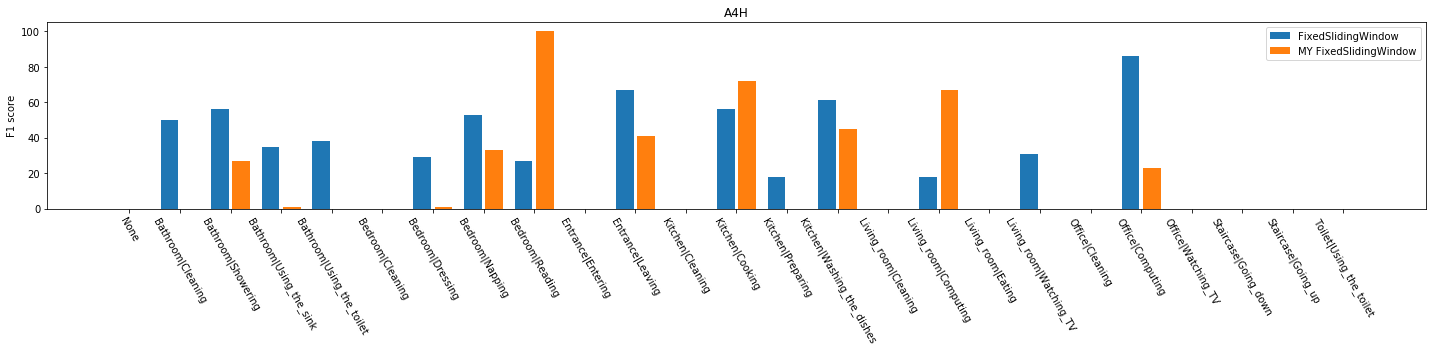

In [2]:
def get_my_eval(datasetname='CASAS',data_dscr='Home1',reqinfo=['SimpleKeras','SimpleFeatureExtraction']):
    import os
    import pandas as pd
    list=os.listdir('save_data/')
    list.sort(key=lambda f:os.path.getmtime('save_data/'+f),reverse=True)
    result={}
    dataset=None
    for item in list:
        if not (datasetname in item):continue
        try:
            res=utils.loadState(item)
            if(len(res)!=3):
                #raise Error
                logger.warn('File %s can not import'%item)
                continue
            [run_info,datasetdscr,evalres]=res
            name=evalres[0].shortrunname.split('_')
            print(name)
            name=name[1]
            if not(datasetdscr.data_dscr==data_dscr):continue
            
            for r in reqinfo:
                if not(r in evalres[0].shortrunname):
                    #print(r)
                    continue
#             tbl=getRunTable(run_info,datasetdscr,evalres)
            
            
            result[name]=evalres
            dataset=datasetdscr
        except Exception as e:
            print('File %s can not import error '%item)
            import sys
            import traceback
            print(e, file=sys.stderr)
            traceback.print_exc()

    return dataset,result


dataset,myevalres=get_my_eval('A4H','A4H')
vs.plot_pre_act(dataset,myevalres)